<a href="https://colab.research.google.com/github/mohanakhilpidugu/PRODIGY_WD_02/blob/main/AI_LAB_EXPERIMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# Reshape the data to fit the model
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Create the model
model = Sequential()

# Add the layers
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8847 - loss: 0.3829 - val_accuracy: 0.9601 - val_loss: 0.1245
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.1072 - val_accuracy: 0.9700 - val_loss: 0.1007
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9772 - loss: 0.0706 - val_accuracy: 0.9728 - val_loss: 0.0913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9720 - val_loss: 0.0973
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0491 - val_accuracy: 0.9723 - val_loss: 0.1007
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9867 - loss: 0.0398 - val_accuracy: 0.9745 - val_loss: 0.0908
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9883 - loss: 0.0325 - val_accuracy: 0.9773 - val_loss: 0.0911
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9890 - loss: 0.0

In [6]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9695 - loss: 0.1420
Test accuracy: 0.973800003528595


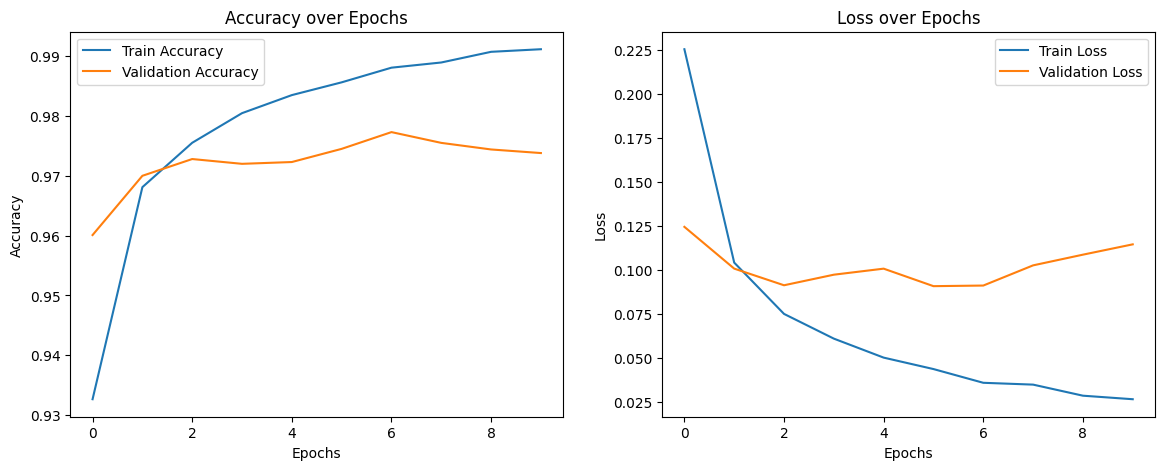

In [7]:
# We plot both training and validation accuracy and loss over epochs to see how the model performs.
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()